# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

In [1]:
! git clone https://github.com/ds4e/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 6), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 7.16 MiB | 6.43 MiB/s, done.
Resolving deltas: 100% (6/6), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
college = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

In [5]:
#Checkign dimensions
college.shape

#How many observations are there?
college.shape[0]
print(f'There are {college.shape[0]} observations')

#What are the variables included?
college.columns
print(f'The variables included are {college.columns}')

#Use .head() to examine the first few rows of data.
college.head()


There are 3798 observations
The variables included are Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [6]:
#Cross-Tabulate control and level
pd.crosstab(college['control'], college['level'])

#Describe the patterns you see: This descriptive data shows me that there are way more private not-for-profit 4-year colleges then 2-year colleges. There are also more 2-year public universities than 4-year universities. There is a more equal number of private for-profit 2-year and 4-year universities.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


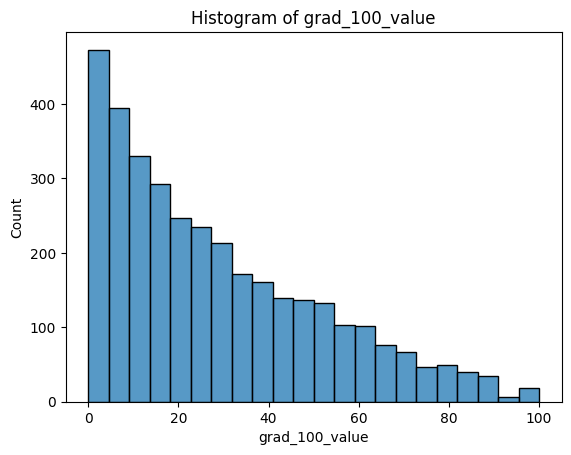

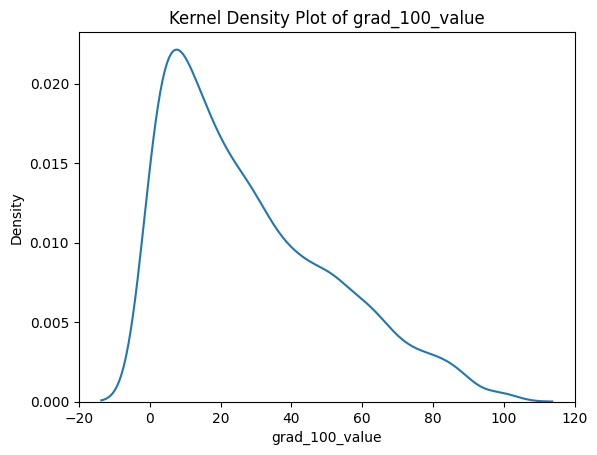

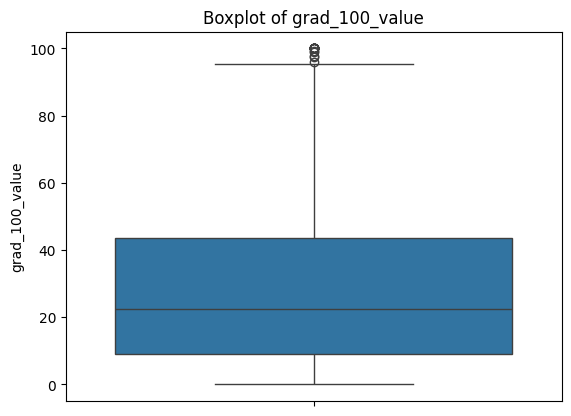

In [7]:
#grad_100_value histogram
sns.histplot(college['grad_100_value'])
plt.title('Histogram of grad_100_value')
plt.show()

#kernel density plot
sns.kdeplot(college['grad_100_value'])
plt.title('Kernel Density Plot of grad_100_value')
plt.show()

#boxplot
sns.boxplot(college['grad_100_value'])
plt.title('Boxplot of grad_100_value')
plt.show()

In [8]:
#statistical description of grad_100_values
college['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


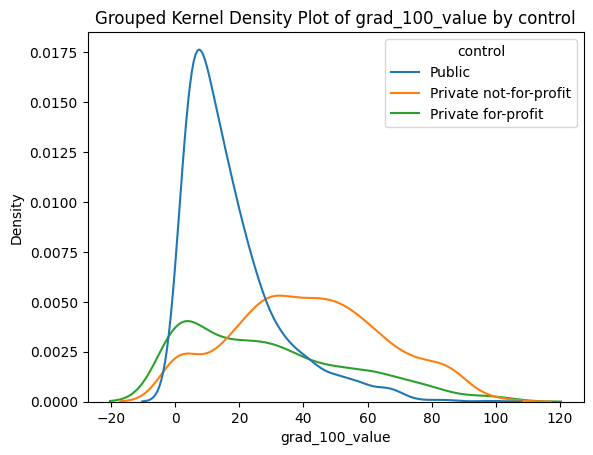

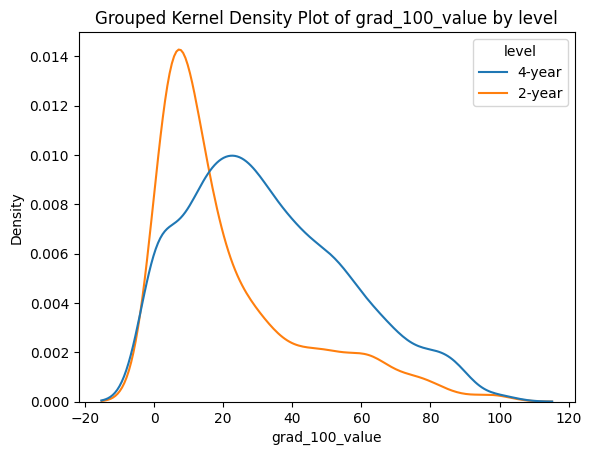

In [9]:
#Grouped Kernel Density Plot with control
sns.kdeplot(data=college, x='grad_100_value', hue='control')
plt.title('Grouped Kernel Density Plot of grad_100_value by control')
plt.show()

#Grouped Kernel Density Plit with level
sns.kdeplot(data=college, x='grad_100_value', hue='level')
plt.title('Grouped Kernel Density Plot of grad_100_value by level')
plt.show()


In [10]:
#Statistical Descriptions of grad_100_value by level and control
college.groupby(['level', 'control'])['grad_100_value'].describe()

#What institutions appear to have the best gradiation rates? private not-for-profit 4-year schools appear to have the best gradiation rates.

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

In [11]:
#Create new variable 'levelXcontrol' that equals 'level' + 'control'
college['levelXcontrol'] = college['level'] + ', ' + college['control']

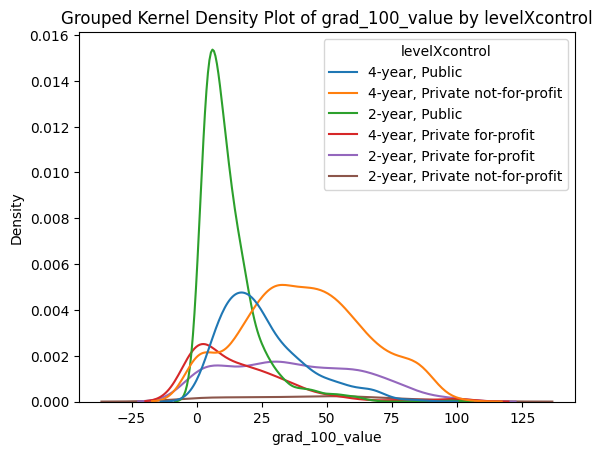

In [12]:
#Grouped kernel density plot
sns.kdeplot(data=college, x='grad_100_value', hue='levelXcontrol')
plt.title('Grouped Kernel Density Plot of grad_100_value by levelXcontrol')
plt.show()

#what institutions appear to have the best graduation rate?: Based on this graph, it appears that 2-year public universities have the best graduation rate simply by the large density of students completing their degree. But, it is also important to look at the 4-year private not-for-profit line because, while it does not have a very large peak like the 2-year public does, there is clearly still a large number of people graduating based on the size of the space under the graph.

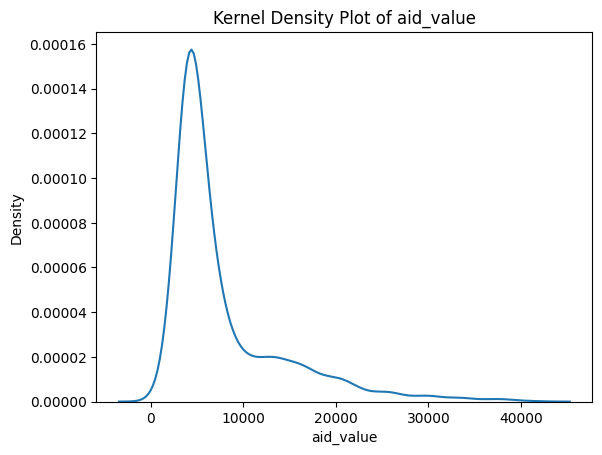

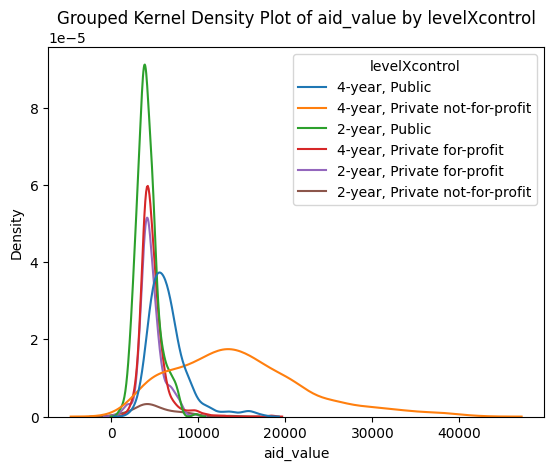

In [13]:
#Kernel Density Plot of aid_value
sns.kdeplot(college['aid_value'])
plt.title('Kernel Density Plot of aid_value')
plt.show()

#Grouped Kernel Density Plot of aid_value by level and control
sns.kdeplot(data=college, x='aid_value', hue='levelXcontrol')
plt.title('Grouped Kernel Density Plot of aid_value by levelXcontrol')
plt.show()
#What explains the shape of the graph?: The amount of aid given explains the shape of the graph. Lower amount of aid are more often given rather than large amounts, which explains the higher density at a lower aid value. Furthermore, when looking at the grouped kde, it makes sense that students attending public universities receive a higher density of lower amounts of aid as a result of scholarship money provided by the state or government. There are fewer studetns at a 4-year private institution receiving aid which also makes sense, they chose to go to a private institution which is more expensive.

In [14]:
#Grouped statistical descriptions
college.groupby(['level', 'control'])['aid_value'].describe()

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

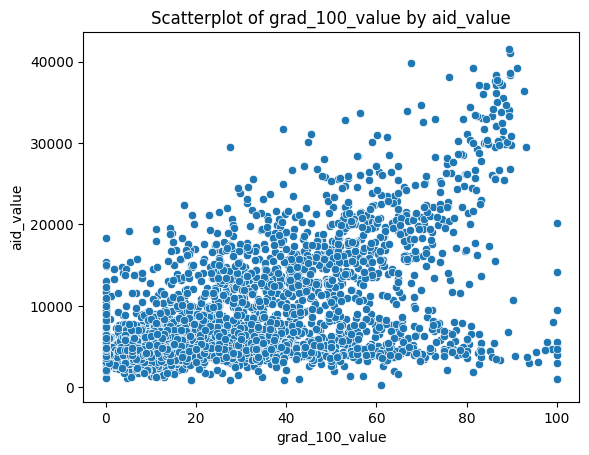

In [15]:
#Scatterplot of grad_100_value by aid_value
sns.scatterplot(data=college, x='grad_100_value', y='aid_value')
plt.title('Scatterplot of grad_100_value by aid_value')
plt.show()
#Describe what you see: this scatterplot generally demonstrates that with more aid, students are more likely to graduate as there is a slight trend upward and to the right.

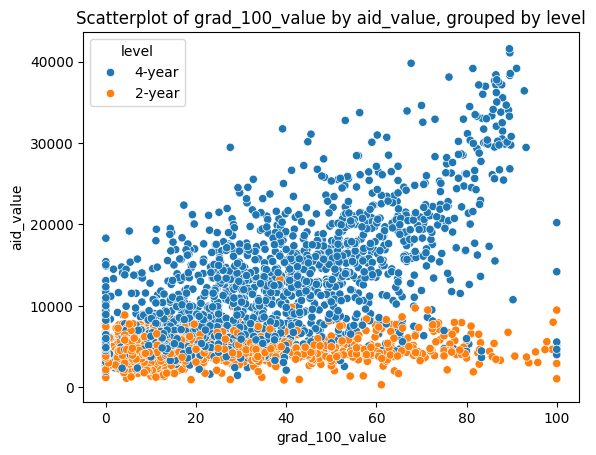

In [16]:
#Scatterplot grouped by level
sns.scatterplot(data=college, x='grad_100_value', y='aid_value', hue='level')
plt.title('Scatterplot of grad_100_value by aid_value, grouped by level')
plt.show()
#desribe what you see: This graph is fascinating because it demonstrates that there is more correlation between aid-value and graduation levels for a 4-year institution vs a 2-year institution.

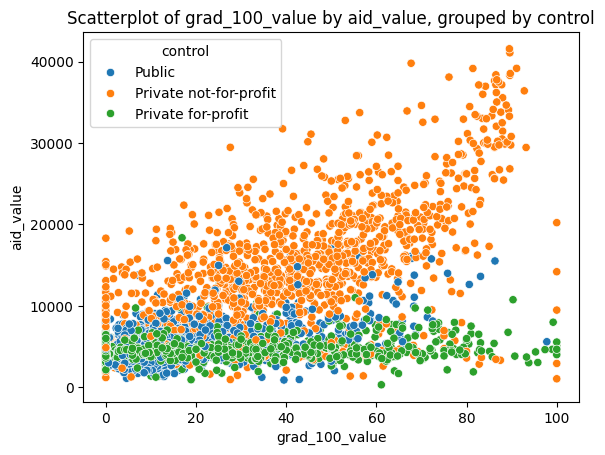

In [17]:
#Scatterplot grouped by control
sns.scatterplot(data=college, x='grad_100_value', y='aid_value', hue='control')
plt.title('Scatterplot of grad_100_value by aid_value, grouped by control')
plt.show()
#describe what you see: when grouped by control, this scatterplot paints a very different picture then the one above. There is clear correlation between aid_value and graduation rate for private not-for-profit institutions compared to private for-profit and public institutions.

What kinds of institutions does aid seem to increase graduation rate?